# Exploratory Analysis

This notebook is to analyse the energy data and come up with more conclusion

In [142]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import math


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

### Load Data

In [5]:
data= pd.read_csv("./Dataset/energydata_complete.csv")

In [6]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<h6>Variable Description<br />
====================</h6>

<ul>
	<li>date time year-month-day hour:minute:second&nbsp;</li>
	<li>Appliances, energy use in Wh</li>
	<li>lights, energy use of light fixtures in the house in Wh</li>
	<li>T1, Temperature in kitchen area, in Celsius</li>
	<li>RH_1, Humidity in kitchen area, in %</li>
	<li>T2, Temperature in living room area, in Celsius</li>
	<li>RH_2, Humidity in living room area, in %</li>
	<li>T3, Temperature in laundry room area</li>
	<li>RH_3, Humidity in laundry room area, in %</li>
	<li>T4, Temperature in office room, in Celsius</li>
	<li>RH_4, Humidity in office room, in %</li>
	<li>T5, Temperature in bathroom, in Celsius</li>
	<li>RH_5, Humidity in bathroom, in %</li>
	<li>T6, Temperature outside the building (north side), in Celsius</li>
	<li>RH_6, Humidity outside the building (north side), in %</li>
	<li>T7, Temperature in ironing room , in Celsius</li>
	<li>RH_7, Humidity in ironing room, in %</li>
	<li>T8, Temperature in teenager room 2, in Celsius</li>
	<li>RH_8, Humidity in teenager room 2, in %</li>
	<li>T9, Temperature in parents room, in Celsius</li>
	<li>RH_9, Humidity in parents room, in %</li>
	<li>To, Temperature outside (from Chi&egrave;vres weather station), in Celsius</li>
	<li>Pressure (from Chi&egrave;vres weather station), in mm Hg</li>
	<li>RH_out, Humidity outside (from Chi&egrave;vres weather station), in %</li>
	<li>Windspeed (from Chi&egrave;vres weather station), in m/s</li>
	<li>Visibility (from Chi&egrave;vres weather station), in km</li>
	<li>Tdewpoint (from Chi&egrave;vres weather station), &deg;C</li>
	<li>rv1, Random variable 1, nondimensional</li>
	<li>rv2, Rnadom variable 2, nondimensional</li>
</ul>

<p>Where indicated, data from the nearest airport weather station (Chi&egrave;vres Airport, Belgium) was downloaded from a public data set from&nbsp;</p>

<p>Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.<br />
&nbsp;</p>


In [7]:
data.shape

(19735, 29)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [9]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

We can conclud that there is no missing values here.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [11]:
data_date = data["date"]
print("First Date time of Observation : ",data_date[0])
print("Last Date time of Observation : ",data_date.iloc[-1])

First Date time of Observation :  2016-01-11 17:00:00
Last Date time of Observation :  2016-05-27 18:00:00


In [152]:
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 33 columns):
date            19735 non-null datetime64[ns]
Appliances      19735 non-null int64
lights          19735 non-null int64
T1              19735 non-null float64
RH_1            19735 non-null float64
T2              19735 non-null float64
RH_2            19735 non-null float64
T3              19735 non-null float64
RH_3            19735 non-null float64
T4              19735 non-null float64
RH_4            19735 non-null float64
T5              19735 non-null float64
RH_5            19735 non-null float64
T6              19735 non-null float64
RH_6            19735 non-null float64
T7              19735 non-null float64
RH_7            19735 non-null float64
T8              19735 non-null float64
RH_8            19735 non-null float64
T9              19735 non-null float64
RH_9            19735 non-null float64
T_out           19735 non-null float64
Press_mm_hg     19735 non-null

In [159]:
data["date"].map(lambda x: x.time())

0        17:00:00
1        17:10:00
2        17:20:00
3        17:30:00
4        17:40:00
5        17:50:00
6        18:00:00
7        18:10:00
8        18:20:00
9        18:30:00
10       18:40:00
11       18:50:00
12       19:00:00
13       19:10:00
14       19:20:00
15       19:30:00
16       19:40:00
17       19:50:00
18       20:00:00
19       20:10:00
20       20:20:00
21       20:30:00
22       20:40:00
23       20:50:00
24       21:00:00
25       21:10:00
26       21:20:00
27       21:30:00
28       21:40:00
29       21:50:00
           ...   
19705    13:10:00
19706    13:20:00
19707    13:30:00
19708    13:40:00
19709    13:50:00
19710    14:00:00
19711    14:10:00
19712    14:20:00
19713    14:30:00
19714    14:40:00
19715    14:50:00
19716    15:00:00
19717    15:10:00
19718    15:20:00
19719    15:30:00
19720    15:40:00
19721    15:50:00
19722    16:00:00
19723    16:10:00
19724    16:20:00
19725    16:30:00
19726    16:40:00
19727    16:50:00
19728    17:00:00
19729    1

In [160]:
def dayoftheweek(day):
    if(day==0):
        return("Monday")
    if(day==1):
        return("Tuesday")
    if(day==2):
        return("Wednesday")
    if(day==3):
        return("Thurday")
    if(day==4):
        return("Friday")
    if(day==5):
        return("Saturday")
    if(day==6):
        return("Sunday")

In [161]:
data["dayoftheweek"] = data['date']
data["dayoftheweek"] = data['dayoftheweek'].apply(lambda x: dayoftheweek(x.dayofweek))
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayoftheweek,WeekDayType,TimeDelta,NSM
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Monday,Weekday,00:00:00,61200
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Monday,Weekday,00:10:00,61800
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Monday,Weekday,00:10:00,62400
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Monday,Weekday,00:10:00,63000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Monday,Weekday,00:10:00,63600
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,Monday,Weekday,00:10:00,64200
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,Monday,Weekday,00:10:00,64800
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,Monday,Weekday,00:10:00,65400
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,Monday,Weekday,00:10:00,66000
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,Monday,Weekday,00:10:00,66600


In [162]:
data.groupby('dayoftheweek').count()["date"]

dayoftheweek
Friday       2845
Monday       2778
Saturday     2736
Sunday       2736
Thurday      2880
Tuesday      2880
Wednesday    2880
Name: date, dtype: int64

In [163]:
def weekdaytype(day):
    if(day=="Saturday" or day == "Sunday"):
        return "weekend"
    else:
        return "Weekday"

In [164]:
data["WeekDayType"] = data["dayoftheweek"]
data["WeekDayType"] = data['WeekDayType'].apply(lambda x: weekdaytype(x))
data.groupby('WeekDayType').count()["date"]

WeekDayType
Weekday    14263
weekend     5472
Name: date, dtype: int64

In [165]:
data["TimeDelta"] = (data["date"]-data["date"].shift()).fillna(0)

In [166]:
data.groupby('TimeDelta').count()["date"]

TimeDelta
00:00:00        1
00:10:00    19734
Name: date, dtype: int64

In [167]:
t = np.arange(0.0,1.0,0.01)

In [168]:
data["date"][0].month

1

In [169]:
months = data["date"].apply(lambda x: x.month)
months_indata = months.unique()

In [170]:
m = 2
test = data[(data['date'].map(lambda x: x.month) == 2) ]
test

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayoftheweek,WeekDayType,TimeDelta,NSM
2922,2016-02-01 00:00:00,40,20,22.230000,46.433333,21.290000,46.126667,21.700000,46.500000,19.290000,...,94.000000,8.000000,27.000000,10.500000,36.003944,36.003944,Monday,Weekday,00:10:00,0
2923,2016-02-01 00:10:00,50,10,22.200000,46.433333,21.290000,46.200000,21.700000,46.500000,19.230000,...,93.500000,8.166667,29.166667,10.416667,46.708604,46.708604,Monday,Weekday,00:10:00,600
2924,2016-02-01 00:20:00,40,10,22.175000,46.522500,21.260000,46.260000,21.666667,46.400000,19.200000,...,93.000000,8.333333,31.333333,10.333333,34.632194,34.632194,Monday,Weekday,00:10:00,1200
2925,2016-02-01 00:30:00,50,10,22.100000,46.590000,21.200000,46.260000,21.600000,46.400000,19.200000,...,92.500000,8.500000,33.500000,10.250000,44.429047,44.429047,Monday,Weekday,00:10:00,1800
2926,2016-02-01 00:40:00,40,20,22.100000,46.730000,21.166667,46.400000,21.600000,46.433333,19.200000,...,92.000000,8.666667,35.666667,10.166667,11.433293,11.433293,Monday,Weekday,00:10:00,2400
2927,2016-02-01 00:50:00,50,10,22.033333,46.790000,21.100000,46.466667,21.600000,46.500000,19.200000,...,91.500000,8.833333,37.833333,10.083333,27.328448,27.328448,Monday,Weekday,00:10:00,3000
2928,2016-02-01 01:00:00,60,10,22.000000,47.000000,21.100000,46.530000,21.666667,46.560000,19.166667,...,91.000000,9.000000,40.000000,10.000000,10.349960,10.349960,Monday,Weekday,00:10:00,3600
2929,2016-02-01 01:10:00,50,10,22.000000,47.060000,21.100000,46.590000,21.700000,46.500000,19.100000,...,91.166667,8.666667,37.333333,10.000000,26.852489,26.852489,Monday,Weekday,00:10:00,4200
2930,2016-02-01 01:20:00,40,10,21.890000,47.090000,21.066667,46.560000,21.760000,46.500000,19.100000,...,91.333333,8.333333,34.666667,10.000000,48.463889,48.463889,Monday,Weekday,00:10:00,4800
2931,2016-02-01 01:30:00,50,10,21.890000,47.090000,21.000000,46.500000,21.790000,46.466667,19.100000,...,91.500000,8.000000,32.000000,10.000000,40.161695,40.161695,Monday,Weekday,00:10:00,5400


In [171]:
%matplotlib inline
def f(month, parameter):
    new_data = data[(data['date'].map(lambda x: x.month) == month)]
    plt.plot(new_data['date'].map(lambda x: x.day), new_data[parameter])
    plt.figure(figsize=(30,100))
    plt.show()
print("Input Month")
interact(f, month=months_indata, parameter = list(data))

Input Month


interactive(children=(Dropdown(description='month', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='parameter', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'dayoftheweek', 'WeekDayType', 'TimeDelta', 'NSM'), value='date'), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

In [173]:
from ipywidgets import widgets
from IPython.display import display
text = widgets.Text()
display(text)
text.on_submit('hello')

Text(value='')

In [174]:
data['NSM'] = pd.to_datetime(data['date'])
data['NSM'] = (data['NSM'].dt.hour*60 + data['NSM'].dt.minute)*60 + data['NSM'].dt.second

In [175]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayoftheweek,WeekDayType,TimeDelta,NSM
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Monday,Weekday,00:00:00,61200
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Monday,Weekday,00:10:00,61800
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Monday,Weekday,00:10:00,62400
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Monday,Weekday,00:10:00,63000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Monday,Weekday,00:10:00,63600
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,Monday,Weekday,00:10:00,64200
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,Monday,Weekday,00:10:00,64800
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,Monday,Weekday,00:10:00,65400
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,Monday,Weekday,00:10:00,66000
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,Monday,Weekday,00:10:00,66600


In [176]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def day_visual(Day,Month, parameter1, parameter2,save):
    new_data = data[(data['date'].map(lambda x: x.day) == Day) & (data['date'].map(lambda x: x.month) == Month)]
    plt.subplot(211)
    title = "Plot of "+parameter1+" and " +parameter2+" vs time"
    plt.title("Plot of "+parameter1+" and " +parameter2+" vs time" ) 
    plt.plot(new_data['date'].map(lambda x: x.hour), new_data[parameter1])
    plt.xlabel("Time") 
    plt.ylabel(parameter1)
    plt.subplot(212) 
    plt.plot(new_data['date'].map(lambda x: x.hour), new_data[parameter2])
    plt.ylabel(parameter2)
    plt.xlabel("Time")
    if(save):
        plt.savefig("./results/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
    return print("Correlation between ",parameter1," and ",parameter2,"is",str(new_data[parameter1].corr(new_data[parameter2])))
interact(day_visual,Day=day_date,Month=month_date, parameter1 = list(data),parameter2 = list(data), save=save)

interactive(children=(Dropdown(description='Day', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31), value=1), Dropdown(description='Month', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='parameter1', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'dayoftheweek', 'WeekDayType', 'TimeDelta', 'NSM'), value='date'), Dropdown(description='parameter2', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'dayoftheweek', 'WeekDayType', 'TimeDelta', 'NSM'), value='date'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.day_visual>

In [30]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def day_visual(Month, parameterx, parametery,save):
    new_data = data[(data['date'].map(lambda x: x.month) == Month)]
    title = "Plot of "+parameterx+" vs " +parametery
    plt.title(title) 
    plt.plot(new_data[parameterx], new_data[parametery])
    plt.xlabel(parameterx) 
    plt.ylabel(parametery)
    if(save):
        plt.savefig("./results/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
interact(day_visual,Month=month_date, parameterx = list(data),parametery = list(data), save=save)

interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='parameterx', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'dayoftheweek', 'WeekDayType', 'TimeDelta', 'NSM'), value='date'), Dropdown(description='parametery', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'dayoftheweek', 'WeekDayType', 'TimeDelta', 'NSM'), value='date'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.day_visual>

In [31]:
data["date"] = data["date"].map(lambda x: str(x))


In [103]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dayoftheweek,WeekDayType,TimeDelta,NSM
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Monday,Weekday,00:00:00,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Monday,Weekday,00:10:00,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Monday,Weekday,00:10:00,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,Monday,Weekday,00:10:00,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,Monday,Weekday,00:10:00,63600


In [33]:
data.to_csv("eda_new.csv",index =False)

### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [126]:
#Select response y and Training set X
my_cols = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']
X = data[my_cols]
y = data['Appliances']

In [133]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [134]:
lm = LinearRegression()

In [135]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
predict = lm.predict(X_test)

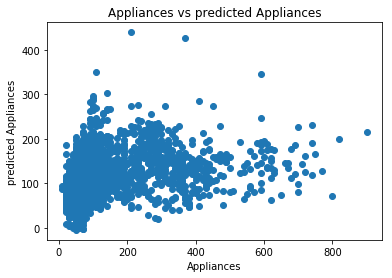

In [137]:
# scatter plot
plt.scatter(y_test, predict)
plt.xlabel('Appliances')
plt.ylabel("predicted Appliances")
plt.title("Appliances vs predicted Appliances")
plt.show()

In [138]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predict))

In [139]:
rms

91.27909612258756

In [141]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

-0.20560790078346391

### Multiple Linear Regression

In [2]:
import statsmodels.api as sm

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from pandas.core import datetools

In [127]:
X.shape

(19735, 28)

In [128]:
y.head()

0    60
1    60
2    50
3    50
4    60
Name: Appliances, dtype: int64

In [129]:
#splitting dataset into training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [130]:
# Fitting Multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([198.25305253,  93.22933243, 150.37044298, ...,  73.09447814,
       131.38686163,  92.84198684])

In [132]:
# Building the optimal model 
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((19735, 28)).astype(int), values = X, axis = 1)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     146.7
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:03:39   Log-Likelihood:            -1.1757e+05
No. Observations:               19735   AIC:                         2.352e+05
Df Residuals:                   19707   BIC:                         2.354e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2668      3.384     -0.079      0.937      -6.900       6.367
x1            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x2            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x3            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x4            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x5            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x6            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x7            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x8            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x9            -0.2668      3.384     -0.079      0.937      -6.900       6.367
x10           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x11           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x12           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x13           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x14           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x15           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x16           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x17           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x18           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x19           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x20           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x21           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x22           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x23           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x24           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x25           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x26           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x27           -0.2668      3.384     -0.079      0.937      -6.900       6.367
x28            1.9100      0.096     19.945      0.000       1.722       2.098
x29           -2.3988      1.855     -1.293      0.196      -6.036       1.238
x30           14.4945      0.675     21.485      0.000      13.172      15.817
x31          -18.0151      1.632    -11.042      0.000     -21.213     -14.817
x32          -13.3666      0.766    -17.442      0.000     -14.869     -11.864
x33           26.0163      1.054     24.694      0.000      23.951      28.081
x34            4.8029      0.674      7.128      0.000       3.482       6.124
x35           -3.1338      1.024     -3.061      0.002      -5.141      -1.127
x3

### Fit a classification tree using DecisionTreeClassifier() in scikit-learn

In [95]:
#Select response y and Training set X
my_cols = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']
X = data[my_cols]
y = data['Appliances']

In [96]:
from sklearn import tree
cltree = tree.DecisionTreeClassifier()
cltree = cltree.fit(X, y)

### Accuracy of this model

In [97]:
#Evaluate the model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(cltree, X, y, cv=10)
print(scores.mean())

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.04281244924095536


### RandomForest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
#splitting dataset into training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [112]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [122]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy',  random_state=0 )
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [123]:
classifier.feature_importances_

array([0.02212429, 0.03135801, 0.03792941, 0.03921574, 0.03452899,
       0.03370446, 0.03771427, 0.03346983, 0.03317838, 0.0308882 ,
       0.03681037, 0.035209  , 0.03697842, 0.03100238, 0.03395981,
       0.04091653, 0.04105882, 0.02678491, 0.03726341, 0.03386832,
       0.03950128, 0.03815834, 0.02853052, 0.02299895, 0.03221728,
       0.03060222, 0.03085783, 0.08917004])

In [124]:
y_pred = classifier.predict(X_test)
y_pred

array([300,  50, 200, ...,  50,  80,  50], dtype=int64)

In [125]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  1,  1, ...,  0,  0,  0],
       [ 0, 17, 20, ...,  0,  0,  0],
       [ 1, 19, 36, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)